https://www.ncbi.nlm.nih.gov/books/NBK541070/
    
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')


%pylab inline
%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 6,3

Populating the interactive namespace from numpy and matplotlib


In [19]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
data = pd.read_csv('tendency_to_obesity.csv')

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### As we can see, there are no missing values in the dataset, which slightly simplifies our life

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Let's put our weight types in the correct order (from Insufficient_Weight to Obesity_Type_III) for correct visualization.

In [6]:
data['NObeyesdad'] = pd.Categorical(data['NObeyesdad'],
                                   ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                                    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], ordered=True)

#### We have some incorect data. For example float Age, CH2O, FAF and others. Let's make some data fixing

In [7]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
data['TUE'] = data['TUE'].apply(lambda x: round(x))
data['CH2O'] = data['CH2O'].apply(lambda x: round(x))
data['NCP'] = data['NCP'].apply(lambda x: round(x))
data['FCVC'] = data['FCVC'].apply(lambda x: round(x))
data['Age'] = data['Age'].apply(lambda x: round(x))
data['Height'] = data['Height'].apply(lambda x: round(x, 2))
data['Weight'] = data['Weight'].apply(lambda x: round(x, 2))
data['FAF'] = data['FAF'].apply(lambda x: round(x))

# Small EDA

Here we cannot draw unambiguous conclusions. But it can be said that spending time on gadgets affects weight.

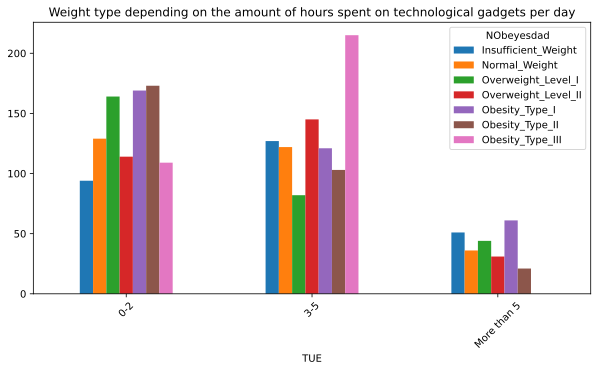

In [10]:
data[['TUE', 'NObeyesdad']].value_counts().unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(range(3), ['0-2', '3-5', 'More than 5'], rotation=45)
plt.title('Weight type depending on the amount of hours spent on technological gadgets per day');

It is undeniable that alcohol consumption affects weight. More than 300 people have **Obesity_type_III**, who asnwered **'Sometimes'** in the survey.

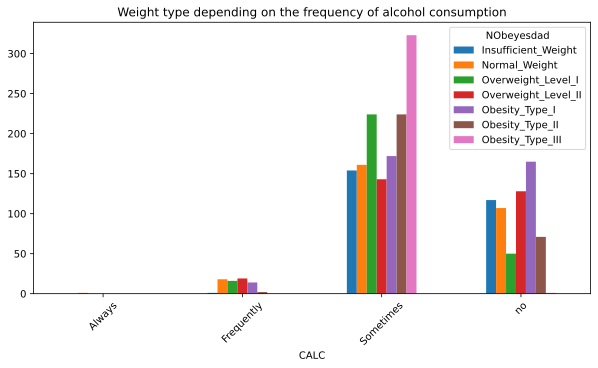

In [38]:
data.groupby('CALC')['NObeyesdad'].value_counts().unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Weight type depending on the frequency of alcohol consumption');

Physical activity is also an important indicator of weight control. We can see that people who do not sports are obese in most cases. And the more days spent on physical activity, the more people are of normal weight or underweight (here maybe people overdo)

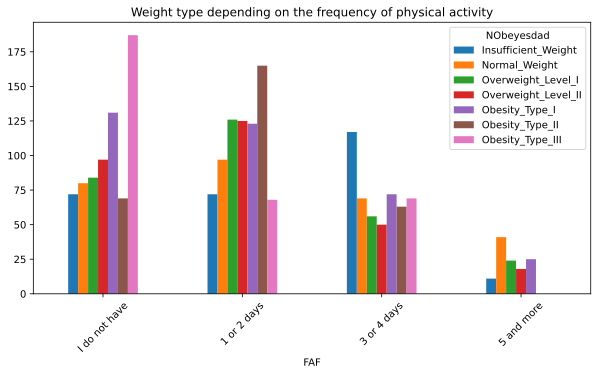

In [12]:
data.pivot_table(index='FAF', columns='NObeyesdad', values='Gender', aggfunc=np.count_nonzero).plot(kind='bar', figsize=(10,5))
plt.title('Weight type depending on the frequency of physical activity');
plt.xticks(range(4), ['I do not have', '1 or 2 days', '3 or 4 days', '5 and more'], rotation=45);

In [22]:
def plotly_Bar_plot(df, title = ''):
    scc_obey = []
    
    for column in df.columns:
        trace = go.Bar(
            x = df.index,
            y = df[column],
            name = column
        )
        scc_obey.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = scc_obey, layout = layout)
    iplot(fig, show_link=False)

It is logical that the vast majority of people do not monitor their calorie intake. However, those people who do this are of normal weight or underweight (anarexic, etc.)

In [24]:
plotly_Bar_plot(data[['SCC', 'NObeyesdad']].value_counts().unstack(), 
                'Weight type based on observation of the number of calories consumed per day')

According to popular belief, weight is influenced by the amount of water that a person drinks. In accordance with the plotted graph, it can be noted that this is not the case.

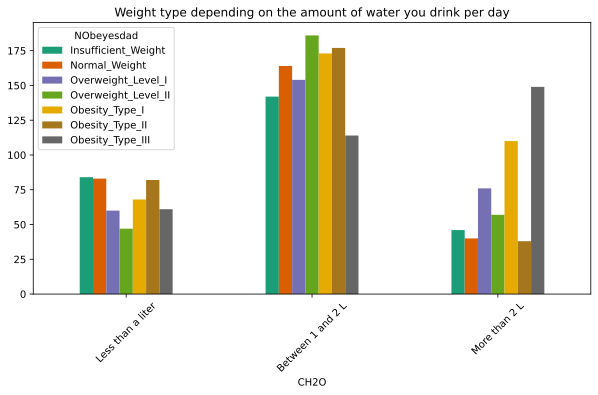

In [43]:
data[['CH2O', 'NObeyesdad']].value_counts().unstack().plot(kind='bar', figsize=(10,5), cmap='Dark2')
plt.title('Weight type depending on the amount of water you drink per day')
plt.xticks(range(3), ['Less than a liter', 'Between 1 and 2 L', 'More than 2 L'], rotation=45);

It is hard to analyse this graph due to small number of people using bikes and motorbikes as way of movement. But it is clearly seen that when moving by public transport or by car, the number of overweight people prevails, and those who use walking are of normal weight.

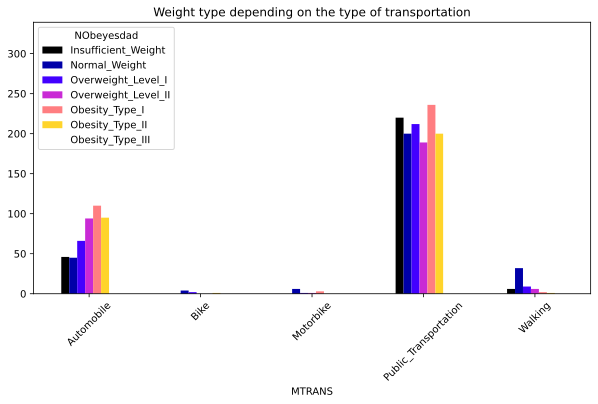

In [45]:
data[['MTRANS', 'NObeyesdad']].value_counts().unstack().plot(kind='bar', figsize=(10,5), cmap='gnuplot2')
plt.title('Weight type depending on the type of transportation')
plt.xticks(rotation=45);

It is clearly seen that Consumption of food between meals does not affect the weight type.

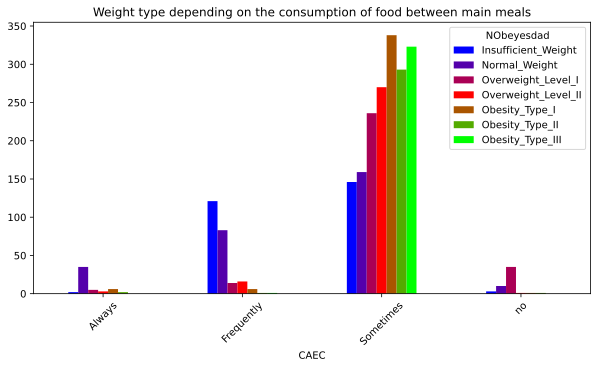

In [46]:
data[['CAEC', 'NObeyesdad']].value_counts().unstack().plot(kind='bar', figsize=(10,5), cmap='brg')
plt.title('Weight type depending on the consumption of food between main meals')
plt.xticks(rotation=45);

The number of main meals affects the weight. Here we can see that those who eat 3 times a day mostly have weight problems. But then again, it is possible that those who eat 3 times eat too much high-calorie food

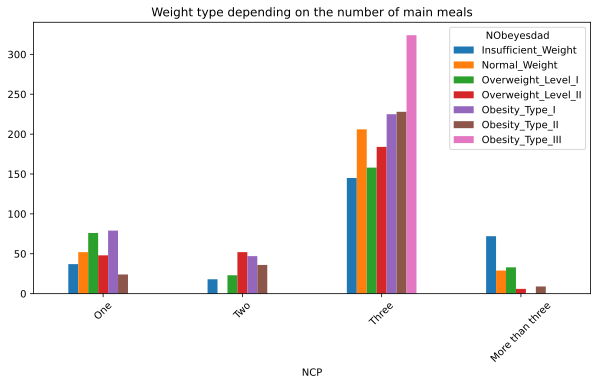

In [47]:
data.pivot_table(index='NCP', columns='NObeyesdad', values='Gender', aggfunc=np.count_nonzero).plot(kind='bar', figsize=(10,5))
plt.title('Weight type depending on the number of main meals');
plt.xticks(range(4), ['One', 'Two', 'Three', 'More than three'], rotation=45);

No questions. People who eat a lot of high-calorie foods for the most part have problems with the weight.

In [37]:
plotly_Bar_plot(data[['FAVC', 'NObeyesdad']].value_counts().unstack(), 
                'Weight type based on the frequency of high-calorie food consumption')

It doesn't matter whether you man or woman.Everyone can have problems with weight. This graph proves it to us.

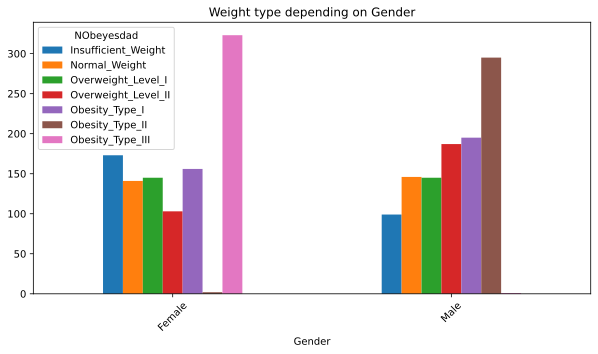

In [49]:
data[['Gender', 'NObeyesdad']].value_counts().unstack().plot(kind='bar', figsize=(10,5))
plt.title('Weight type depending on Gender');
plt.xticks(rotation=45);

Here is the main descriptive statistics. 
* The survey involves people between the ages of 14 and 61. The average age is 24.5 years, which tells us that mostly young people took part in the survey (also histogram).
* Max weight is 173, Min weight is 39. Weight follows a normal distribution. 
* The average height is 1.70 m, it also follows a normal distribution. 

In [50]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093368,26.191163,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700000,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


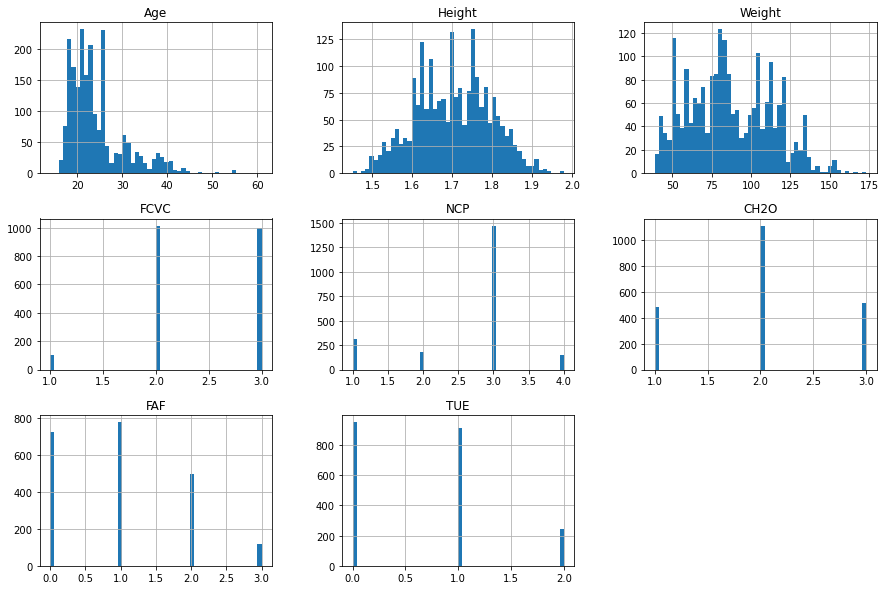

In [25]:
data.hist(figsize=(15, 10), bins=50);

## Model creating

Let's move on to modeling. Let's try logistic regression, svm and random forest.

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [52]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [53]:
X = data.drop('NObeyesdad', axis=1)

We need to replace with 1 and 0 features with 2 possible options

In [54]:
X['Gender'] = X['Gender'].map({'Female': 0, 'Male': 1})
X['family_history_with_overweight'] = X['family_history_with_overweight'].map({'no': 0, 'yes': 1})
X['FAVC'] = X['FAVC'].map({'no': 0, 'yes': 1})
X['SMOKE'] = X['SMOKE'].map({'no': 0, 'yes': 1})
X['SCC'] = X['SCC'].map({'no': 0, 'yes': 1})
X['Height'] = X['Height'].apply(lambda x: x*100)

In [55]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21,162.0,64.0,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation
1,0,21,152.0,56.0,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation
2,1,23,180.0,77.0,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation
3,1,27,180.0,87.0,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking
4,1,22,178.0,89.8,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation


In [63]:
y = data['NObeyesdad']

It is neccesary to divide features on categorical and numeric. Numeric will be standardized and categorical will be transformed with the help of OneHotEncoder

In [56]:
X_cat = X.select_dtypes(include='object')

In [57]:
X_num = X.select_dtypes(include=['float64', 'int64'])

In [58]:
list(X_cat.columns)

['CAEC', 'CALC', 'MTRANS']

In [59]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_cat)
X_cat_new = ohe.transform(X_cat) 
X_cat_new = pd.DataFrame(X_cat_new, columns=list(ohe.get_feature_names(input_features=list(X_cat.columns))))

In [60]:
X_cat_new

,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
new_X = pd.concat([X_num, X_cat_new], axis=1)

Also we need to transform our dependent variable with OrdinalEncoder (to know exactly what number was assigned to this or that type of weight).

In [64]:
le = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
le.fit(y.to_numpy().reshape(-1, 1))
y_new = le.transform(y.to_numpy().reshape(-1, 1))

Divide the dataset into train (model fitting) ans test (to check how well the model on new data). 80/20 ratio

In [66]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y_new, test_size=0.2, random_state=42)

Standardizing our data

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Logistic regression

In [68]:
log_reg = LogisticRegression(C=10, random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=10000)
log_reg.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=10, max_iter=10000, multi_class='multinomial',
                   random_state=42)

In [69]:
log_pred = log_reg.predict(X_test_scaled)
accuracy_score(y_test, log_pred)

0.9456264775413712

0.94 good baseline. Now we can find best hyperparameters (GridSearchCV) and improve the score.

In [70]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        56
         1.0       0.96      0.84      0.90        62
         2.0       0.89      0.91      0.90        56
         3.0       0.92      0.94      0.93        50
         4.0       0.97      0.95      0.96        78
         5.0       0.95      0.98      0.97        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.94      0.95      0.94       423
weighted avg       0.95      0.95      0.95       423



In [72]:
param_log = [{'C': [0.01, 0.1, 1, 10, 100, 1000],
             'solver': ['liblinear', 'newton-cg', 'sag', 'saga','lbfgs'],
             'multi_class': ['multinomial', 'ovr'],
             }]

In [73]:
grid_log = GridSearchCV(LogisticRegression(random_state=42, max_iter=10000), param_log, cv=5, verbose=True, n_jobs=-1)
grid_log.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['multinomial', 'ovr'],
                          'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                     'lbfgs']}],
             verbose=True)

In [74]:
grid_log.best_params_, grid_log.best_score_

({'C': 1000, 'multi_class': 'multinomial', 'solver': 'newton-cg'},
 0.9532070303583657)

In [75]:
best_log = grid_log.best_estimator_
best_log.fit(X_train_scaled, y_train)

LogisticRegression(C=1000, max_iter=10000, multi_class='multinomial',
                   random_state=42, solver='newton-cg')

Accuracy increased by 2 percent

In [76]:
best_log_pred = best_log.predict(X_test_scaled)
print(classification_report(y_test, best_log_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9649    0.9821    0.9735        56
         1.0     0.9365    0.9516    0.9440        62
         2.0     0.9615    0.8929    0.9259        56
         3.0     0.9400    0.9400    0.9400        50
         4.0     0.9625    0.9872    0.9747        78
         5.0     0.9828    0.9828    0.9828        58
         6.0     1.0000    1.0000    1.0000        63

    accuracy                         0.9645       423
   macro avg     0.9640    0.9624    0.9630       423
weighted avg     0.9646    0.9645    0.9643       423



Let's do the same things with Random forests and SVM classifiers.

## Random Forest

In [77]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train.ravel())
prediction_rf = rf_clf.predict(X_test)
print(classification_report(y_test, prediction_rf, digits=4))

              precision    recall  f1-score   support

         0.0     0.9643    0.9643    0.9643        56
         1.0     0.8308    0.8710    0.8504        62
         2.0     0.8596    0.8750    0.8673        56
         3.0     0.9592    0.9400    0.9495        50
         4.0     0.9868    0.9615    0.9740        78
         5.0     1.0000    0.9828    0.9913        58
         6.0     1.0000    1.0000    1.0000        63

    accuracy                         0.9433       423
   macro avg     0.9430    0.9421    0.9424       423
weighted avg     0.9446    0.9433    0.9438       423



In [78]:
param_rf = [{'max_depth': [5, 9, 14, 21],
            'min_samples_split': range(2, 30, 5),
            'min_samples_leaf': range(2, 30, 5),
            'bootstrap': [True, False],
            }]

In [79]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, verbose=True, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [5, 9, 14, 21],
                          'min_samples_leaf': range(2, 30, 5),
                          'min_samples_split': range(2, 30, 5)}],
             verbose=True)

In [80]:
grid_rf.best_params_, grid_rf.best_score_

({'bootstrap': False,
  'max_depth': 14,
  'min_samples_leaf': 2,
  'min_samples_split': 7},
 0.9431285445893982)

In [81]:
best_rf = RandomForestClassifier(n_estimators=100, bootstrap=False, max_depth=14, min_samples_leaf=2, min_samples_split=7)
best_rf.fit(X_train, y_train)
pred_best_rf = best_rf.predict(X_test)
print(classification_report(y_test, prediction_rf, digits=4))

              precision    recall  f1-score   support

         0.0     0.9643    0.9643    0.9643        56
         1.0     0.8308    0.8710    0.8504        62
         2.0     0.8596    0.8750    0.8673        56
         3.0     0.9592    0.9400    0.9495        50
         4.0     0.9868    0.9615    0.9740        78
         5.0     1.0000    0.9828    0.9913        58
         6.0     1.0000    1.0000    1.0000        63

    accuracy                         0.9433       423
   macro avg     0.9430    0.9421    0.9424       423
weighted avg     0.9446    0.9433    0.9438       423



We can see the contribution of each feature to the model

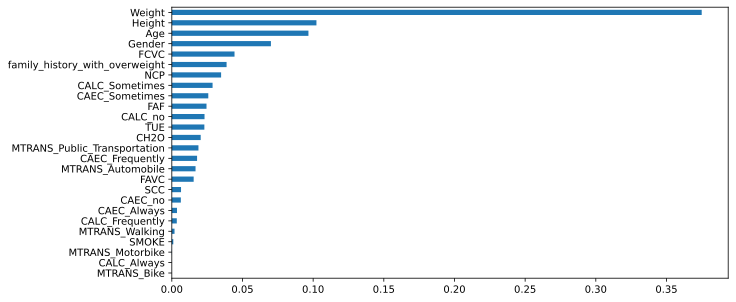

In [83]:
pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns).sort_values().plot(kind='barh', figsize=(10,5))

In [84]:
svc_clf = SVC(random_state=42, kernel='rbf', gamma='scale', C=100)
svc_clf.fit(X_train_scaled, y_train)
pred_svc = svc_clf.predict(X_test_scaled)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        56
         1.0       0.81      0.82      0.82        62
         2.0       0.80      0.86      0.83        56
         3.0       0.94      0.88      0.91        50
         4.0       0.95      0.92      0.94        78
         5.0       0.97      0.98      0.97        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



In [85]:
param_svc = [{'kernel': ['rbf'],
              'C': [0.01, 0.1, 1, 10, 100],
             'gamma': ['scale', 'auto']},
             {'kernel': ['poly'],
             'degree': range(2, 15, 3),
             'C': [0.01, 0.1, 1, 10, 100]}]

In [86]:
greed_svc = GridSearchCV(SVC(random_state=42, probability=True), param_svc, cv=5, verbose=2, n_jobs=-1)
greed_svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': range(2, 15, 3), 'kernel': ['poly']}],
             verbose=2)

In [87]:
greed_svc.best_params_, greed_svc.best_score_

({'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}, 0.9105455375485049)

In [88]:
best_svc = greed_svc.best_estimator_
best_svc.fit(X_train_scaled, y_train)
best_svc_pred = best_svc.predict(X_test_scaled)
print(classification_report(y_test, best_svc_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9636    0.9464    0.9550        56
         1.0     0.8095    0.8226    0.8160        62
         2.0     0.8000    0.8571    0.8276        56
         3.0     0.9362    0.8800    0.9072        50
         4.0     0.9474    0.9231    0.9351        78
         5.0     0.9661    0.9828    0.9744        58
         6.0     1.0000    1.0000    1.0000        63

    accuracy                         0.9173       423
   macro avg     0.9175    0.9160    0.9165       423
weighted avg     0.9189    0.9173    0.9178       423



Logistic regression is a winner. But we can get better result by combining the models. We will use Votingclassifier with soft voting (because we have 3 well calibrated classifiers)

In [89]:
from sklearn.ensemble import VotingClassifier

In [90]:
voting_clf = VotingClassifier(estimators=[('log', best_log), 
                                          ('rf', best_rf),
                                         ('svc', best_svc)], voting='soft')

In [91]:
voting_clf.fit(X_train_scaled, y_train)
voting_pred = voting_clf.predict(X_test_scaled)
print(classification_report(y_test, voting_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9825    1.0000    0.9912        56
         1.0     0.9516    0.9516    0.9516        62
         2.0     0.9464    0.9464    0.9464        56
         3.0     1.0000    0.9600    0.9796        50
         4.0     0.9747    0.9872    0.9809        78
         5.0     0.9828    0.9828    0.9828        58
         6.0     1.0000    1.0000    1.0000        63

    accuracy                         0.9764       423
   macro avg     0.9768    0.9754    0.9761       423
weighted avg     0.9765    0.9764    0.9763       423



Great. The model can be implemented in our telegram bot to classify different weight types. Let's make pipelines of what we are doing earlier in shorten form. (It is allow us to save the model and use all kind of cleaning and transformation on new data)

In [92]:
from sklearn.pipeline  import Pipeline
from sklearn.compose import ColumnTransformer

In [93]:
num_attribs = list(X_num)
cat_attribs = list(X_cat)

In [94]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [95]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [96]:
full_pipeline.fit_transform(X).shape

(2111, 26)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)

In [102]:
y_new

array([[1.],
       [1.],
       [1.],
       ...,
       [6.],
       [6.],
       [6.]])

In [106]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("Voting", voting_clf)
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
pipe_pred = full_pipeline_with_predictor.predict(X_test)

In [107]:
print(classification_report(y_test, pipe_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9483    0.9821    0.9649        56
         1.0     0.9483    0.8871    0.9167        62
         2.0     0.9153    0.9643    0.9391        56
         3.0     1.0000    0.9800    0.9899        50
         4.0     0.9873    1.0000    0.9936        78
         5.0     1.0000    0.9828    0.9913        58
         6.0     1.0000    1.0000    1.0000        63

    accuracy                         0.9716       423
   macro avg     0.9713    0.9709    0.9708       423
weighted avg     0.9720    0.9716    0.9715       423



Now we can save our pipeline.

In [347]:
import dill as pickle
filename_norm = 'model_Obesity.pk' # имя файла для сохранения модели

In [348]:
with open(filename_norm, 'wb') as file:
    pickle.dump(full_pipeline_with_predictor, file)